## Задание 2.4

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ecdf

Открытие .csv файла

In [65]:
data = pd.read_csv('mobile_phones.csv')

Функции для вычисления выборочного среднего, несмещенной выборочной дисперсии и выборочной квантили с использованием функций из библиотеки `numpy`

In [66]:
def sample_mean(sample):
    return np.mean(sample)

def sample_var(sample):
    n = len(sample)
    return n * np.var(sample) / (n - 1)

def sample_quantile(sample, q):
    return np.quantile(sample, q)

In [67]:
def print_stat(name, sample_stat):
    print("\t%s : %f" % (name, sample_stat))

Функция для построения эмпирической функции распределения 

In [68]:
def print_empirical_function(sample, title=None, xlabel=None):
    fig, ax = plt.subplots(1, 1)
    ecdf(sample).cdf.plot(ax)
    ax.set_ylabel('Empirical CDF')
    if xlabel:
        ax.set_xlabel(xlabel)
    if title:
        ax.set_title(title)
    plt.show()

Функция для построения гистограммы распределения 

In [69]:
def print_histogram(sample, bins=10, title=None):
    fig, ax = plt.subplots(1, 1)
    ax.hist(sample, bins=bins, color='royalblue')
    if title:
        plt.title(title)
    plt.show()

Функция построения box-plot для заданных выборок

In [70]:
def print_box_plot(samples, title=None):
    fig, ax = plt.subplots(1, 1)
    ax.boxplot([i['sample'] for i in samples],
               tick_labels=[i['label'] for i in samples])
    if title:
        plt.title(title)
    plt.show()

Вычисление:
* количества моделей, в которые можно вставить 2 сим-карты
* количества моделей, которые поддерживают 3-G
* наибольшего числа ядер у процессора

In [71]:
dual_sum_count = data['dual_sim'].sum()
three_g_count = data['three_g'].sum()
max_cores = data['n_cores'].max()

print("Count with 2 sim-cards: %d" % dual_sum_count)
print("Count with 3-G: %d" % three_g_count)
print("Maximum number of cores: %d" % max_cores)

Count with 2 sim-cards: 1019
Count with 3-G: 1523
Maximum number of cores: 8


Вывод статистики для каждой выборки:
* емкости аккумулятора для всей совокупности
* емкости аккумулятора для моделей, поддерживающих Wi-Fi
* емкости аккумулятора для моделей, не поддерживающих Wi-Fi

И построение box-plot для них

Stats for battery power
	Mean : 1238.518500
	Variance : 193088.359838
	Median : 1226.000000
	Quantile 3/5 : 1395.400000
Empirical function for battery power


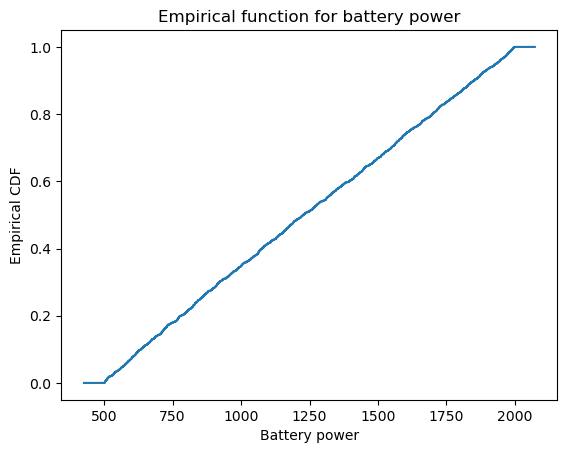

Histogram for battery power


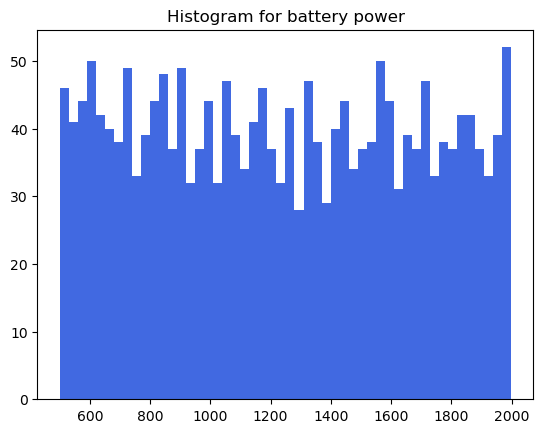

Stats for battery power of phones with wi-fi
	Mean : 1234.904339
	Variance : 190296.400514
	Median : 1233.000000
	Quantile 3/5 : 1390.400000
Empirical function for battery power of phones with wi-fi


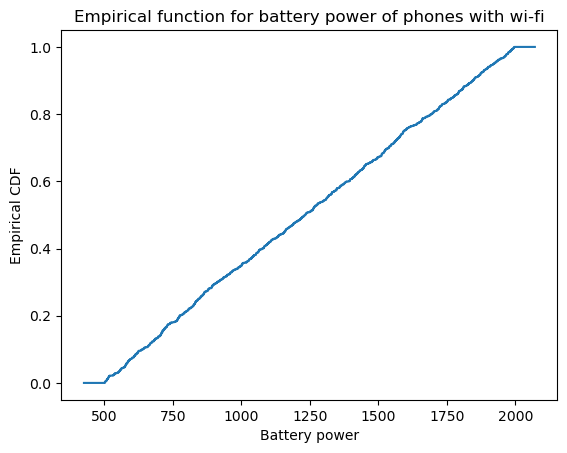

Histogram for battery power of phones with wi-fi


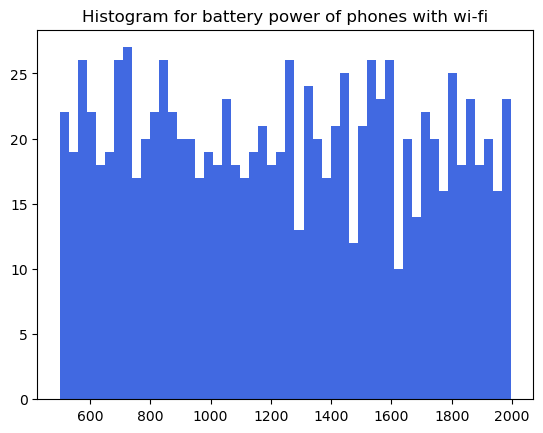

Stats for battery power of phones without wi-fi
	Mean : 1242.235294
	Variance : 196128.437981
	Median : 1222.000000
	Quantile 3/5 : 1403.000000
Empirical function for battery power of phones without wi-fi


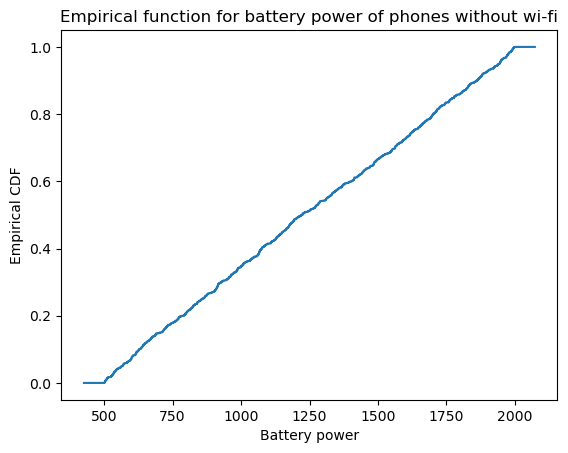

Histogram for battery power of phones without wi-fi


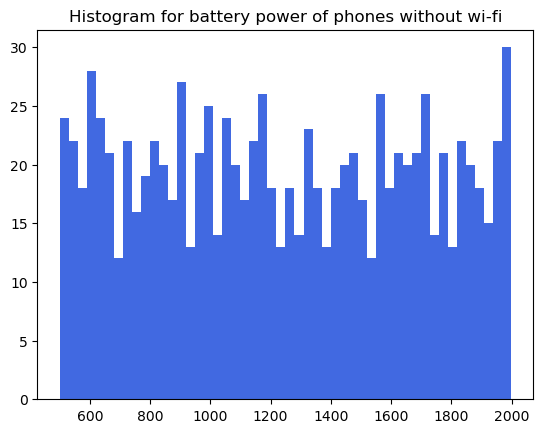

Box-plot for battery power


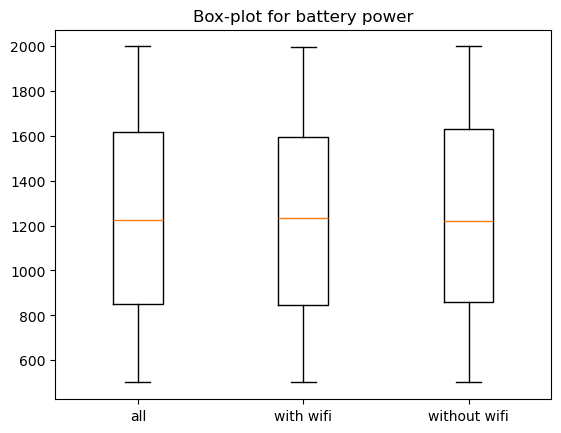

In [72]:
samples = [
    { 'sample' : data['battery_power'],
      'name' : 'battery power',
      'label' : 'all' },
    { 'sample' : data[data['wifi'] == True]['battery_power'],
      'name' : 'battery power of phones with wi-fi',
      'label' : 'with wifi' },
    { 'sample' : data[data['wifi'] == False]['battery_power'],
      'name' : 'battery power of phones without wi-fi',
      'label' : 'without wifi' }
]

for sample in samples:
    print('Stats for %s' % sample['name'])
    print_stat('Mean', sample_mean(sample['sample']))
    print_stat('Variance', sample_var(sample['sample']))
    print_stat('Median', sample_quantile(sample['sample'], 0.5))
    print_stat('Quantile 3/5', sample_quantile(sample['sample'], 3/5))

    emp_func_title = 'Empirical function for %s' % sample['name']
    hist_title = 'Histogram for %s' % sample['name']
    print(emp_func_title)
    print_empirical_function(sample['sample'], title=emp_func_title, xlabel='Battery power')
    print(hist_title)
    print_histogram(sample['sample'], bins=50, title=hist_title)

box_plot_title = 'Box-plot for battery power'
print(box_plot_title)
print_box_plot(samples, title=box_plot_title)